![alt text](1.png "Title")

In [74]:
import pandas as pd

star_dataset = pd.read_csv('star_dataset.csv')

star_dataset = star_dataset[(star_dataset['Spectral Class'] == 'B') | (star_dataset['Spectral Class'] == 'O')]

star_dataset_2features = star_dataset[['Temperature (K)','Absolute magnitude(Mv)']]

X_features = star_dataset_2features.to_numpy()

In [75]:
df = pd.DataFrame(star_dataset_2features)
df['Spectral Class'] = star_dataset['Spectral Class']
df

,Temperature (K),Absolute magnitude(Mv),Spectral Class
20,25000,10.58,B
24,16500,11.89,B
30,39000,-4.70,O
31,30000,-4.20,B
32,15276,-1.97,B
...,...,...,...
233,27739,-7.59,B
234,21904,-7.67,B
235,38940,-9.93,O
236,30839,-10.63,O


In [76]:
class_b = df[df['Spectral Class'] == 'B']
class_o = df[df['Spectral Class'] == 'O']

display(class_b.reset_index())
display(class_o.reset_index())

,index,Temperature (K),Absolute magnitude(Mv),Spectral Class
0,20,25000,10.58,B
1,24,16500,11.89,B
2,31,30000,-4.20,B
3,32,15276,-1.97,B
4,33,9700,0.16,B
5,49,33750,-6.10,B
6,83,17200,12.45,B
7,84,14100,12.17,B
8,86,12010,12.13,B
9,87,10980,11.19,B


,index,Temperature (K),Absolute magnitude(Mv),Spectral Class
0,30,39000,-4.700,O
1,99,36108,-4.400,O
2,101,40000,-6.230,O
3,102,23000,-5.760,O
4,103,17120,-6.890,O
5,104,11096,-5.910,O
6,105,14245,-6.120,O
7,106,24630,-5.830,O
8,107,12893,-6.340,O
9,108,24345,-6.240,O


In [87]:
print(class_b.mean())

print(class_o.mean())

Temperature (K)           19574.478261
Absolute magnitude(Mv)        3.722609
dtype: float64
Temperature (K)           22294.075000
Absolute magnitude(Mv)       -6.596175
dtype: float64


### <font color=blue>1. Maximum Likelihood</font> ###

__Report Mean and Covariance values for each class__

In [ ]:
import random
import csv
from collections import defaultdict
from math import e
from math import pi
import requests
import re


class GaussNB:

    def __init__(self, normalize=False, standardize=False):
        self.summaries = {}
        self.normalize = normalize
        self.standardize = standardize

    def load_csv(self, data, clean='', header=False, rows=0, delimiter=','):
        """
        :param data:
        :param clean:
        :param header:
        :param rows:
        :param delimiter:
        :return:
        Load and convert each string of data into float
        """
        lines = csv.reader(data.splitlines(), delimiter=delimiter)
        dataset = list(lines)
        if header:
            # remove header
            dataset = dataset[1:]
        if rows:
            dataset = dataset[:rows]
        if clean in ['adult']:
            for i in range(len(dataset)):
                if not dataset[i]:
                    # skipping empty rows
                    continue
                sex = dataset[i][9].lower().strip()
                dataset[i] = [float(re.search('\d+', x).group(0)) for x in dataset[i] if re.search('\d+', x)]
                dataset[i].append(sex)
        elif clean in ['iris', 'diabetes', 'redwine']:
            for i in range(len(dataset)):
                dataset[i] = [float(x) if re.search('\d', x) else x for x in dataset[i]]
        else:
            print('Add dataset.')
            return None
        return dataset

    def normalize_data(self, data):
        minimum = min(data)
        maximum = max(data)
        min_max = minimum - maximum
        result = [abs((i - minimum) / min_max) for i in data]
        return result

    def standardize_data(self, data):
        stdev = self.stdev(data)
        avg = self.mean(data)
        result = [(i - avg) / stdev for i in data]
        return result

    def split_data(self, data, weight):
        """
        :param data:
        :param weight: indicates the percentage of rows that'll be used for testing
        :return:
        Randomly select rows for testing.
        """
        train_size = int(len(data) * weight)
        train_set = []
        for i in range(train_size):
            index = random.randrange(len(data))
            train_set.append(data[index])
            data.pop(index)
        return [train_set, data]

    def mean(self, numbers):
        result = sum(numbers) / float(len(numbers))
        return result

    def stdev(self, numbers):
        """
        :param numbers: list of numbers
        :return:
        Calculate the standard deviation for a list of numbers.
        """
        avg = self.mean(numbers)
        squared_diff_list = []
        for num in numbers:
            squared_diff = (num - avg) ** 2
            squared_diff_list.append(squared_diff)
        squared_diff_sum = sum(squared_diff_list)
        sample_n = float(len(numbers) - 1)
        var = squared_diff_sum / sample_n
        return var ** .5

    def group_by_class(self, data, target):
        """
        :param data: Training set. Lists of events (rows) in a list
        :param target: Index for the target column. Usually the last index in the list
        :return:
        Mapping each target to a list of it's features
        """
        target_map = defaultdict(list)
        for index in range(len(data)):
            features = data[index]
#             if not features:
#                 continue
            x = features[target]
            target_map[x].append(features[:-1])
        print('Identified %s different target classes: %s' % (len(target_map.keys()), target_map.keys()))
        return dict(target_map)

    def summarize(self, test_set):
        """
        :param test_set: lists of features
        :return:
        Use zip to line up each feature into a single column across multiple lists.
        yield the mean and the stdev for each feature.
        """
        for feature in zip(*test_set):
            yield {
                'stdev': self.stdev(feature),
                'mean': self.mean(feature)
            }

    def train(self, train_list, target):
        """
        :param data:
        :param target: target class
        :return:
        For each target:
            1. yield prior_prob: the probability of each class. P(class) eg P(Iris-virginica)
            2. yield summary: list of {'mean': 0.0, 'stdev': 0.0}
        """
        group = self.group_by_class(train_list, target)
        self.summaries = {}
        for target, features in group.items():
            self.summaries[target] = {
                'prior_prob': self.prior_prob(group, target, train_list),
                'summary': [i for i in self.summarize(features)],
            }
        return self.summaries

    def prior_prob(self, group, target, data):
        """
        :return:
        The probability of each target class
        """
        total = float(len(data))
        result = len(group[target]) / total
        return result

    def normal_pdf(self, x, mean, stdev):
        """
        :param x: a variable
        :param mean: µ - the expected value or average from M samples
        :param stdev: σ - standard deviation
        :return: Gaussian (Normal) Density function.
        N(x; µ, σ) = (1 / 2πσ) * (e ^ (x–µ)^2/-2σ^2
        """
        variance = stdev ** 2
        exp_squared_diff = (x - mean) ** 2
        exp_power = -exp_squared_diff / (2 * variance)
        exponent = e ** exp_power
        denominator = ((2 * pi) ** .5) * stdev
        normal_prob = exponent / denominator
        return normal_prob

    def get_prediction(self, test_vector):
        """
        :param test_vector: single list of features to test
        :return:
        Return the target class with the largest/best posterior probability
        """
        posterior_probs = self.posterior_probabilities(test_vector)
        best_target = max(posterior_probs, key=posterior_probs.get)
        return best_target

    def joint_probabilities(self, test_row):
        """
        :param test_row: single list of features to test; new data
        :return:
        Use the normal_pdf(self, x, mean, stdev) to calculate the Normal Probability for each feature
        Take the product of all Normal Probabilities and the Prior Probability.
        """
        joint_probs = {}
        for target, features in self.summaries.items():
            total_features = len(features['summary'])
            likelihood = 1
            for index in range(total_features):
                feature = test_row[index]
                mean = features['summary'][index]['mean']
                stdev = features['summary'][index]['stdev']
                normal_prob = self.normal_pdf(feature, mean, stdev)
                likelihood *= normal_prob
            prior_prob = features['prior_prob']
            joint_probs[target] = prior_prob * likelihood
        return joint_probs

    def posterior_probabilities(self, test_row):
        """
        :param test_row: single list of features to test; new data
        :return:
        For each feature (x) in the test_row:
            1. Calculate Predictor Prior Probability using the Normal PDF N(x; µ, σ). eg = P(feature | class)
            2. Calculate Likelihood by getting the product of the prior and the Normal PDFs
            3. Multiply Likelihood by the prior to calculate the Joint Probability.
        E.g.
        prior_prob: P(setosa)
        likelihood: P(sepal length | setosa) * P(sepal width | setosa) * P(petal length | setosa) * P(petal width | setosa)
        joint_prob: prior_prob * likelihood
        marginal_prob: predictor prior probability
        posterior_prob = joint_prob/ marginal_prob
        returning a dictionary mapping of class to it's posterior probability
        """
        posterior_probs = {}
        joint_probabilities = self.joint_probabilities(test_row)
        marginal_prob = self.marginal_pdf(joint_probabilities)
        for target, joint_prob in joint_probabilities.items():
            posterior_probs[target] = joint_prob / marginal_prob
        return posterior_probs

    def marginal_pdf(self, joint_probabilities):
        """
        :param joint_probabilities: list of joint probabilities for each feature
        :return:
        Marginal Probability Density Function (Predictor Prior Probability)
        Joint Probability = prior * likelihood
        Marginal Probability is the sum of all joint probabilities for all classes.
        marginal_pdf =
          [P(setosa) * P(sepal length | setosa) * P(sepal width | setosa) * P(petal length | setosa) * P(petal width | setosa)]
        + [P(versicolour) * P(sepal length | versicolour) * P(sepal width | versicolour) * P(petal length | versicolour) * P(petal width | versicolour)]
        + [P(virginica) * P(sepal length | verginica) * P(sepal width | verginica) * P(petal length | verginica) * P(petal width | verginica)]
        """
        marginal_prob = sum(joint_probabilities.values())
        return marginal_prob

    def predict(self, test_set):
        """
        :param test_set: list of features to test on
        :return:
        Predict the likeliest target for each row of the test_set.
        Return a list of predicted targets.
        """
        predictions = []
        for row in test_set:
            result = self.get_prediction(row)
            predictions.append(result)
        return predictions

    def accuracy(self, test_set, predicted):
        """
        :param test_set: list of test_data
        :param predicted: list of predicted classes
        :return:
        Calculate the the average performance of the classifier.
        """
        correct = 0
        actual = [item[-1] for item in test_set]
        for x, y in zip(actual, predicted):
            if x == y:
                correct += 1
        return correct / float(len(test_set))

In [ ]:
import numpy as np
"""
:return:
Training and testing data
"""
xcols = ['Temperature (K)','Absolute magnitude(Mv)']
X = class_b
X['Spectral Class'].map({'B' : 1})
y = class_b['Spectral Class']
# X = pd.DataFrame(StandardScaler().fit_transform(X), columns=xcols)
# X['Spectral Class'] = class_b.reset_index()['Spectral Class']
# train_list, test_list = nb.split_data(data, weight)

X = np.array(X).astype(float)
# print 'Split %s rows into train=%s and test=%s rows' % (len(data), len(train_list), len(test_list))

nb = GaussNB()
nb.train(X, -1)
predicted_list = nb.predict(X)
accuracy = nb.accuracy(X, X)
print ('Accuracy: %.3f' % accuracy)

### <font color=blue>2. Bayesian Density Estimation</font> ###
__1. Report Mean and Covariance values for each class__<br>

In [72]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

class Bayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = dict()
        self.priors = dict()
        self.uniqe_labels = np.unique(Y)
        labels = np.unique(Y)
        for c in labels:
            labeling = Y == c
#             print(labeling)
            index = labeling[labeling == True].index.tolist()
            current_x = X.loc[index]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'cov': np.cov(current_x.T) + np.eye(D)*smoothing,
            }
            labeling = Y == c
            index = labeling[labeling == True].index.tolist()
            self.priors[c] = float(len(index)) / len(Y)
        return self.gaussians

    def score(self, X, Y):
        P = self.predict(X)
        Y_array = np.array(Y)
        Y_array = Y_array.reshape(Y_array.shape[0],).astype(int)
             
        self.compute_scores(self.find_confusion_matrix(Y_array, P))
        
        return np.mean(P == Y_array)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in self.gaussians.items():
            mean, cov = g['mean'], g['cov']
            P[:, int(c)] = mvn.logpdf(X, mean=mean, cov=cov) + np.log(self.priors[c])
        return np.argmax(P, axis=1)
    
        # Plot Confusion
    def find_confusion_matrix(self, actual, predicted, normalize=False):
            unique = sorted(set(actual))
            matrix = [[0 for _ in unique] for _ in unique]
            imap   = {key: i for i, key in enumerate(unique)}
            # Generate Confusion Matrix
            for p, a in zip(predicted, actual):
                matrix[imap[p]][imap[a]] += 1
            # Matrix Normalization
            if normalize:
                sigma = sum([sum(matrix[imap[i]]) for i in unique])
                matrix = [row for row in map(lambda i: list(map(lambda j: j / sigma, i)), matrix)]
            self.plot_confusion_matrix(matrix, unique)
            return matrix


    def plot_confusion_matrix(self, cm,
                              target_names,
                              title='Confusion matrix',
                              cmap=None,
                              normalize=False):
        cm = np.array(cm)
        accuracy = np.trace(cm) / float(np.sum(cm))
        misclass = 1 - accuracy

        if cmap is None:
            cmap = plt.get_cmap('Blues')

        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45)
            plt.yticks(tick_marks, target_names)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")


        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
        plt.show()
    
    def compute_precision(self, tp, fp):
        return (tp  * 100)/ float( tp + fp)
    
    def compute_accuracy(self, tp, tn, fn, fp):
        return ((tp + tn) * 100)/ float( tp + tn + fn + fp)

    def compute_recall(self, tp, fn):
        return (tp  * 100)/ float( tp + fn)

    def compute_tp_tn_fn_fp(self, confusion_matrix):
        confusion_matrix = np.array(confusion_matrix)
        fp = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
        fn = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
        tp = np.diag(confusion_matrix)
        tn = confusion_matrix.sum() - (fp + fn + tp)
        return tp, tn, fp, fn

    def compute_scores(self, confusion_matrix):
        # calculates the F1 score
        tp, tn, fp, fn = self.compute_tp_tn_fn_fp(confusion_matrix)

        for i in range(len(self.uniqe_labels)): 
            accuracy = self.compute_accuracy(tp[i], tn[i], fn[i], fp[i])
            precision = self.compute_precision(tp[i], fp[i])/100
            recall = self.compute_recall(tp[i], fn[i])/100
            f1_score = (2*precision*recall)/ (precision + recall)

            print("Class Number : ", i, " Accuracy score : ", accuracy, " F1 Score : ", f1_score)
            print()

        print("Total Accuracy: ",sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix))



Training time: 0:00:00.004560


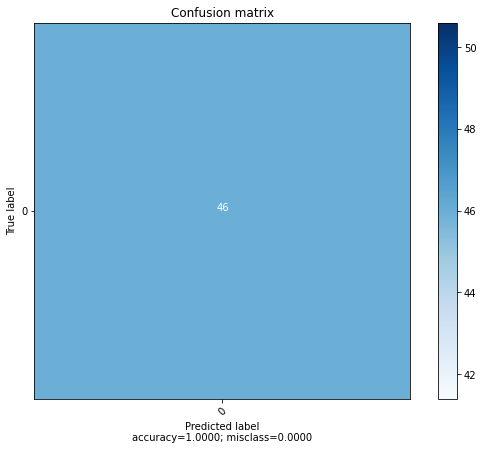

Class Number :  0  Accuracy score :  100.0  F1 Score :  1.0

Total Accuracy:  1.0
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00.188797 Train size: 46


{'mean': Temperature (K)           19574.478261
 Absolute magnitude(Mv)        3.722609
 dtype: float64,
 'cov': array([[ 3.83811002e+07, -2.73795393e+04],
        [-2.73795393e+04,  7.68345575e+01]])}

In [84]:
import numpy as np

X = class_b.drop('Spectral Class', axis = 1)
y = class_b['Spectral Class']
y = y.map({'B': 0})

model = Bayes()

t0 = datetime.now()
gaussians = model.fit(X, y)

print("Training time:", (datetime.now() - t0))
t0 = datetime.now()

print("Train accuracy:", model.score(X, y))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(y))

gaussians[0]

Training time: 0:00:00.006136


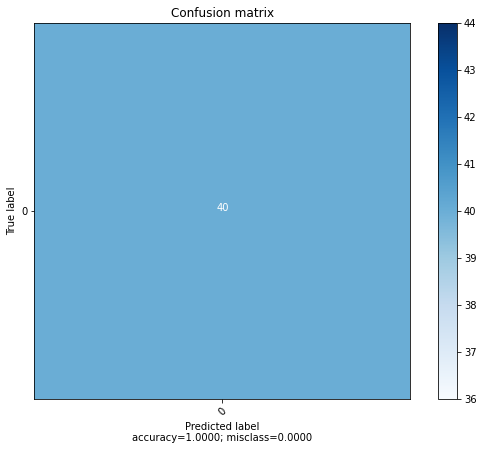

Class Number :  0  Accuracy score :  100.0  F1 Score :  1.0

Total Accuracy:  1.0
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00.202614 Train size: 40


{'mean': Temperature (K)           22294.075000
 Absolute magnitude(Mv)       -6.596175
 dtype: float64,
 'cov': array([[ 1.12145834e+08, -6.33964756e+02],
        [-6.33964756e+02,  2.30389040e+00]])}

In [85]:
import numpy as np

X = class_o.drop('Spectral Class', axis = 1)
y = class_o['Spectral Class']
y = y.map({'O': 0})

model = Bayes()

t0 = datetime.now()
gaussians = model.fit(X, y)

print("Training time:", (datetime.now() - t0))
t0 = datetime.now()

print("Train accuracy:", model.score(X, y))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(y))

gaussians[0]

### <font color=blue>3. Expectation Maximization</font> ###
__1. Report Mean and Covariance values for each class__<br>
__2. Plot the Clusters__

In [78]:
import itertools
import matplotlib.pyplot as plt
from scipy import linalg
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [47]:
#the only way to detect the accuracy is vote of the majority
#for each label given
#we check which iris type is the majority
#we consider the majority as the correct classification
#all we need to do is to count the minority
def get_accuracy(data,class_,checked):
    
    df=data.copy()
    #use dictionary to keep track of everything
    d={}
    
    #counting
    for i in df['label'][df['Spectral Class']==class_].unique():
        if i not in checked and i!=-1:
            d[i]=df['label'][df['Spectral Class']==class_].tolist().count(i)

    #comparison
    temp=-1
    lbl=None
    for i in d:
        if d[i]>temp:
            lbl=i
            temp=d[i]

    return len(df['label'][df['Spectral Class']==class_][df['label']!=lbl])

#initialize random miu, sigma and weight for each gaussian
#you can use random number like i do
#or use kmeans centroids which is more computation expensive
def init_params(df,num_of_clusters):
    
    mean_vec=[];cov_mat=[];w_vec=[]

    for _ in range(num_of_clusters):
        mean_vec.append(
            df.loc[np.random.choice(len(df),10)].mean().tolist())
        cov_mat.append(np.diag([1]*len(df.columns)))
        w_vec.append(1/num_of_clusters)
    
    return (mean_vec,cov_mat,w_vec)

#pdf of multivariate gaussian
#equivalent to scipy.stats.multivariate_normal(miu,sigma).pdf(X)
def multivariate_gaussian(data,miu,sigma):
    
    numerator=np.exp(-0.5*(
        np.mat(data)-miu)*np.linalg.inv(sigma)*(np.mat(data)-miu).T)

    denominator=(2*np.pi)**(data.shape[1]/2)*np.linalg.det(sigma)**0.5

    return np.diagonal(numerator/denominator)

#e step
#compute the posterior probability with given params
def e_step(data,num_of_clusters,params):
    
    #unpack params
    mean_vec,cov_mat,w_vec=params
    
    TEMP={}
    posterior={}
    
    #Bayes rule
    for i in range(num_of_clusters):        
        
        TEMP[i]=multivariate_gaussian(data,mean_vec[i],cov_mat[i])*w_vec[i]
    
    #compute posterior
    for i in range(num_of_clusters):
        
        posterior[i]=TEMP[i]/np.sum([TEMP[i] for i in TEMP],axis=0)
        
    return posterior


#m step
#use posterior probability to update params
def m_step(data,num_of_clusters,params,posterior):
    
    #unpack params
    mean_vec,cov_mat,w_vec=params
    
    #solving lagrangian by partial derivatives
    for i in range(num_of_clusters):

        mean_vec[i]=np.sum(
            np.multiply(
                np.mat(data),
                posterior[i].reshape(-1,1),),axis=0)/sum(posterior[i]).T
        
        cov_mat[i]=np.multiply(
            posterior[i].reshape(-1,1),
            (np.mat(data)-mean_vec[i])).T*(
            np.mat(data)-mean_vec[i])/sum(posterior[i])
        
        w_vec[i]=posterior[i].mean()
        
    return (mean_vec,cov_mat,w_vec)


#using jensens inequality to compute the lower bound
#which is the function of the expectation
def get_lower_bound(data,num_of_clusters,params,posterior):
    
    #unpack params
    mean_vec,cov_mat,w_vec=params
    
    lowerbound=0

    for i in range(num_of_clusters):

        #log pdf of multivariate gaussian
        logpdf=np.log(multivariate_gaussian(data,mean_vec[i],cov_mat[i]))
        
        #use bayes rules to decompose the numerator of the lower bound
        lowerbound+=np.sum(
            posterior[i]*(logpdf+np.log(w_vec[i])-np.log(posterior[i])))

    return lowerbound

#using mle for training
def training(data,num_of_clusters,
             tolerance=0.0001,num_of_itr=50,diagnosis=False):
    
    #initialize
    lower_bound_old=None
    lower_bound=None
    counter=0    
    
    #initial parameters
    params=init_params(data,num_of_clusters)

    #cap the maximum number of iterations
    while counter<num_of_itr:
        
        try:
            
            #e step
            posterior=e_step(data,num_of_clusters,params)
            
            #m step
            params=m_step(data,num_of_clusters,params,posterior)
            
            counter+=1
        
        #reboot everything when singular matrix is encountered
        except np.linalg.LinAlgError:
            
            params=init_params(data,num_of_clusters)
            lower_bound_old=None
            lower_bound=None
            counter=0
    
    if diagnosis:
        print(f'{counter} iterations to reach convergence\n')
        
    return params

#the main function
def gmm(df,xcols,num_of_clusters,tolerance=0.001,num_of_itr=50,diagnosis=False):
    
    data=df.copy()
    
    #obtain parameters of gmm
    params=training(data[xcols],num_of_clusters,
                    tolerance,num_of_itr,diagnosis)
    
    #compute the prediction probability
    posterior=e_step(data[xcols],num_of_clusters,params)
    #make forecast based upon probability
    data['label']=np.argmax(
          np.concatenate(
              [posterior[i].reshape(-1,1) for i in posterior],axis=1),1)
    
    #compute accuracy
    erreur=0
    checked=[]
    for i in data['Spectral Class'].unique():
        erreur += get_accuracy(data,i,checked)
        checked.append(i)
    accuracy=1-erreur/len(df)
    if diagnosis:
        print('\naccuracy: %s'%(accuracy))
    
    return params,posterior

100 iterations to reach convergence


accuracy: 1.0
Covariance


,0,1
0,1.000000,-0.504217
1,-0.504217,1.000000


mean


,0,1
0,1.942890e-16,-2.413528e-17


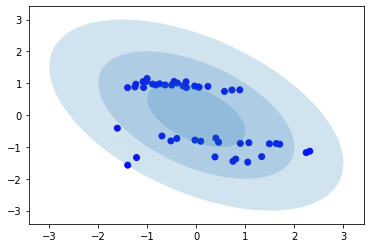

In [92]:
from sklearn.preprocessing import StandardScaler

xcols = ['Temperature (K)','Absolute magnitude(Mv)']
X = class_b.drop('Spectral Class', axis=1)
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=xcols)
X['Spectral Class'] = class_b.reset_index()['Spectral Class']

params,posterior=gmm(X,xcols,1,num_of_itr=100,diagnosis=True)

for pos, covar, w in zip(params[0], params[1], params[2]):
    print("Covariance")
    display(pd.DataFrame(covar))
    print("mean")
    display(pd.DataFrame(pos))
    


class_labels = X['Spectral Class']
plt.scatter(X['Temperature (K)'], X['Absolute magnitude(Mv)'], c=class_labels, cmap=matplotlib.colors.ListedColormap(['yellow']), label=class_labels)

w_factor = 0.2 / max(params[2])
for pos, covar, w in zip(params[0], params[1], params[2]):
    draw_ellipse(np.array(pos)[0], covar, alpha=w * w_factor)

100 iterations to reach convergence


accuracy: 1.0
Covariance


,0,1
0,1.000000,-0.039526
1,-0.039526,1.000000


mean


,0,1
0,-5.551115e-17,-2.442491e-16


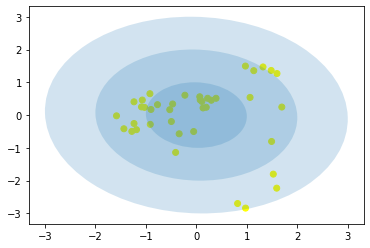

In [96]:
from sklearn.preprocessing import StandardScaler

xcols = ['Temperature (K)','Absolute magnitude(Mv)']
X = class_o.drop('Spectral Class', axis=1)
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=xcols)
X['Spectral Class'] = class_o.reset_index()['Spectral Class']

params,posterior=gmm(X,xcols,1,num_of_itr=100,diagnosis=True)

for pos, covar, w in zip(params[0], params[1], params[2]):
    print("Covariance")
    display(pd.DataFrame(covar))
    print("mean")
    display(pd.DataFrame(pos))
    


class_labels = X['Spectral Class']
plt.scatter(X['Temperature (K)'], X['Absolute magnitude(Mv)'], c=np.ones(40), cmap=matplotlib.colors.ListedColormap(['yellow']), label=class_labels)

w_factor = 0.2 / max(params[2])
for pos, covar, w in zip(params[0], params[1], params[2]):
    draw_ellipse(np.array(pos)[0], covar, alpha=w * w_factor)

### <font color=blue>4. Gaussian HMM</font><br> ###

__1. Write the Transition Matrix and Emission Matrix__<br><br>
__2. What is the probability of <font color=green>Sunny, Rainy, Rainy, Rainy, Snowy, Snowy</font>? (No need to code!)__<br><br>
__3. Suppose that a man wore <font color=green>Coat, Coat, Umbrella, Umbrella, T-shirt, Umbrella, Coat</font>. What is the most likely weather condition in these 7 consecutive days?__

In [90]:
V = ['Vt', 'Vc', 'Vu']
W = ['Wsu', 'Wra', 'Wsn']

# Transition matrix
alpha = [[0.8, 0.15, 0.05],
         [0.38, 0.6, 0.02],
         [0.75, 0.05, 0.2]]

# Emission matrix
beta = [[0.6, 0.3,   0.1],
        [0.05, 0.3, 0.65],
        [0.0, 0.5, 0.5]]

old_w = [0.7,
         0.25,
         0.05]



# question 2

In [88]:
# see Wt = [Wsu, Wra, Wra, Wra, Wsn, Wsn]

# answer: P(Wsu)P(Wra|Wsu)P(Wra|Wra)P(Wra|Wra)P(Wsn|Wra)P(Wsn|Wsn)

0.7 * 0.3 * 0.6 * 0.6 * 0.65 * 0.5

0.02457

In [92]:
Vt = [1, 1, 2, 2, 0, 2, 1]

final_path = []
for k in Vt:
    w_new = np.zeros(len(W))
    for i in range(len(W)):       
        temp = 0
        
        for j in range(len(W)):
            temp += old_w[j] * alpha[j][i]
#         print('Path nunber: ' ,Vt[k] ,temp, beta[i][k])
        w_new[i] = beta[i][k] * temp
    
    path = list(w_new)
#     print(path)
    final_path.append(path.index(max(path)))
    
    old_w = w_new

print(old_w)
print(final_path)

# Most likly state: Sunny, Sunny, Rainy, Rainy, Sunny, Rainy, Sunny with probility of 1.92015073e-08

[1.92015073e-08 1.31096191e-08 2.81446091e-09]
[0, 0, 1, 1, 0, 1, 0]
